In [14]:
import requests, json, time, fastbook
fastbook.setup_book()

In [15]:
from fastbook import *
from fastai.vision.widgets import *

In [16]:
emotions_data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [17]:
emotions = emotions_data_block.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [18]:
path = Path('img/FAST_AI')
dls = emotions.dataloaders(path)

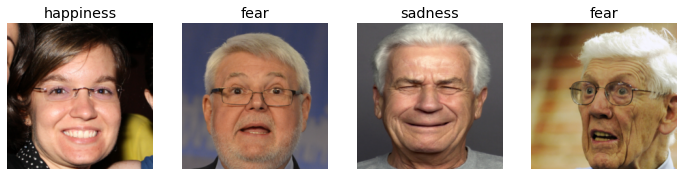

In [19]:
dls.valid.show_batch(max_n=4, nrows=1)

In [20]:
!wget -c --no-check-certificate -P ~/.cache/torch/hub/checkpoints/ https://download.pytorch.org/models/resnet34-b627a593.pth

--2021-10-22 11:37:01--  https://download.pytorch.org/models/resnet34-b627a593.pth
SSL_INIT
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving download.pytorch.org (download.pytorch.org)... 2600:9000:20ac:f600:d:607e:4540:93a1, 2600:9000:20ac:b600:d:607e:4540:93a1, 2600:9000:20ac:7a00:d:607e:4540:93a1, ...
Connecting to download.pytorch.org (download.pytorch.org)|2600:9000:20ac:f600:d:607e:4540:93a1|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,2.470279,1.976990,0.250000,00:23


epoch,train_loss,valid_loss,accuracy,time
0,1.994680,1.697040,0.200000,00:27
1,1.962739,1.509580,0.250000,00:27
2,1.996549,1.373710,0.350000,00:29
3,1.820623,1.295793,0.400000,00:28
4,1.765651,1.273914,0.450000,00:30
5,1.567422,1.281665,0.500000,00:29
6,1.407049,1.307234,0.600000,00:28
7,1.297990,1.340967,0.600000,00:28


In [ ]:
learn.dls.vocab

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(5, nrows=1)